# 1. Walkthrough

### 1.1 Programming For Data Analytics and Data Preparation Visualization (EDA)

In [52]:
import pandas as pd
#Import pandas library for data manipulation and analysis.

import numpy as np
#Import numpy library for numerical operations and array handling.

import seaborn as sns
#Import seaborn for statistical data visualization.

import matplotlib.pyplot as plt
#Import matplotlib for creating plots and visualizations.

%matplotlib inline
#Display visualizations within Jupyter Notebook.

sns.set(color_codes=True)
#Set seaborn to use color codes for better visualizations.


In [48]:
df=pd.read_csv("Population_Estimates_202309.csv")

### Exploratory Data Analysis (EDA)

In [53]:
df.head(4)
# Observe the data by using the head function

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V02508,Age Group,C02199V02655,Sex,UNIT,VALUE
0,PEA01,Population Estimates (Persons in April),1950,1950,200,Under 1 year,-,Both sexes,Thousand,61.1
1,PEA01,Population Estimates (Persons in April),1950,1950,200,Under 1 year,1,Male,Thousand,31.4
2,PEA01,Population Estimates (Persons in April),1950,1950,200,Under 1 year,2,Female,Thousand,29.7
3,PEA01,Population Estimates (Persons in April),1950,1950,205,0 - 4 years,-,Both sexes,Thousand,NaN


In [54]:
df.tail(4)
# Exploratore Data Analysis
# Observe the data by using the tail function

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V02508,Age Group,C02199V02655,Sex,UNIT,VALUE
5990,PEA01,Population Estimates (Persons in April),2023,2023,630,85 years and over,2,Female,Thousand,53.9
5991,PEA01,Population Estimates (Persons in April),2023,2023,-,All ages,-,Both sexes,Thousand,5281.6
5992,PEA01,Population Estimates (Persons in April),2023,2023,-,All ages,1,Male,Thousand,2606.2
5993,PEA01,Population Estimates (Persons in April),2023,2023,-,All ages,2,Female,Thousand,2675.4


In [55]:
df.dtypes
# Used to retrieve the data types of each column in a DataFrame

STATISTIC           object
STATISTIC Label     object
TLIST(A1)            int64
Year                 int64
C02076V02508        object
Age Group           object
C02199V02655        object
Sex                 object
UNIT                object
VALUE              float64
dtype: object

In [56]:
df.count()
# It provides a count of the valid data points in each column.

STATISTIC          5994
STATISTIC Label    5994
TLIST(A1)          5994
Year               5994
C02076V02508       5994
Age Group          5994
C02199V02655       5994
Sex                5994
UNIT               5994
VALUE              5880
dtype: int64

In [57]:
df.describe(include=object)
# It provides summary statistics specifically for the columns containing data types. This can be useful to understand the characteristics of categorical or textual data.

,STATISTIC,STATISTIC Label,C02076V02508,Age Group,C02199V02655,Sex,UNIT
count,5994,5994,5994,5994,5994,5994,5994
unique,1,1,27,27,3,3,1
top,PEA01,Population Estimates (Persons in April),200,Under 1 year,-,Both sexes,Thousand
freq,5994,5994,222,222,1998,1998,5994


In [58]:
df.info()
# Used to obtain a concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5994 entries, 0 to 5993
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC        5994 non-null   object 
 1   STATISTIC Label  5994 non-null   object 
 2   TLIST(A1)        5994 non-null   int64  
 3   Year             5994 non-null   int64  
 4   C02076V02508     5994 non-null   object 
 5   Age Group        5994 non-null   object 
 6   C02199V02655     5994 non-null   object 
 7   Sex              5994 non-null   object 
 8   UNIT             5994 non-null   object 
 9   VALUE            5880 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 468.4+ KB


In [59]:
df = df.drop(['STATISTIC', 'STATISTIC Label', 'Year', 'C02076V02508', 'UNIT', 'C02199V02655'], axis=1)
df.head(4)

# Dropping irrelevant columns

,TLIST(A1),Age Group,Sex,VALUE
0,1950,Under 1 year,Both sexes,61.1
1,1950,Under 1 year,Male,31.4
2,1950,Under 1 year,Female,29.7
3,1950,0 - 4 years,Both sexes,NaN


In [60]:
df = df.rename(columns={'TLIST(A1)':'Year', 'C02076V02508' : 'Age Group_Code', 'Age Group' : 'Age_Group', 'C02199V02655' : 'Sex_Code', 'UNIT' : 'Unit', 'VALUE' : 'Value', 'C02199V02655' : 'Sex_Code', 'UNIT' : 'Unit', 'VALUE' : 'Value'})
df.head(5)

#Renaming the column names


,Year,Age_Group,Sex,Value
0,1950,Under 1 year,Both sexes,61.1
1,1950,Under 1 year,Male,31.4
2,1950,Under 1 year,Female,29.7
3,1950,0 - 4 years,Both sexes,NaN
4,1950,0 - 4 years,Male,NaN


In [61]:
print(df.isnull().sum())

# Total number of missing values per column

Year           0
Age_Group      0
Sex            0
Value        114
dtype: int64


In [62]:
df.dropna(axis=0,inplace=True)
df.head(7)
# Removing rows with missing values

,Year,Age_Group,Sex,Value
0,1950,Under 1 year,Both sexes,61.1
1,1950,Under 1 year,Male,31.4
2,1950,Under 1 year,Female,29.7
6,1950,0 - 14 years,Both sexes,851.2
7,1950,0 - 14 years,Male,434.6
8,1950,0 - 14 years,Female,416.6
9,1950,1 - 4 years,Both sexes,249.1


In [63]:
df.shape
# Used to determine the dimensions of a DataFrame.

(5880, 4)

In [64]:
df.count()
# In order to have a view of the valid data right after the data was cleaned.

Year         5880
Age_Group    5880
Sex          5880
Value        5880
dtype: int64

### Data Visuzalisation Techniques

<Axes: xlabel='Value'>

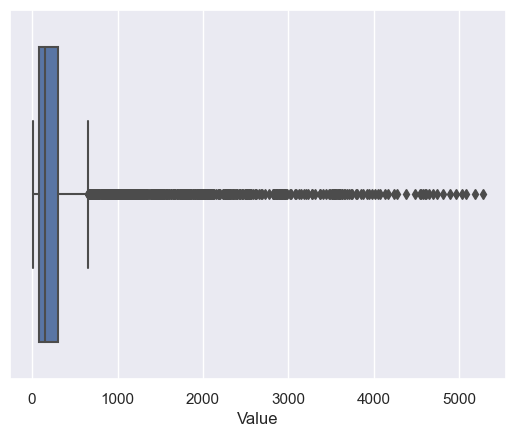

In [68]:
sns.boxplot(x=df["Value"]) 
# Detecting Outliers - Which are used to show an extremely high or extremely low data point.

<Axes: xlabel='Year'>

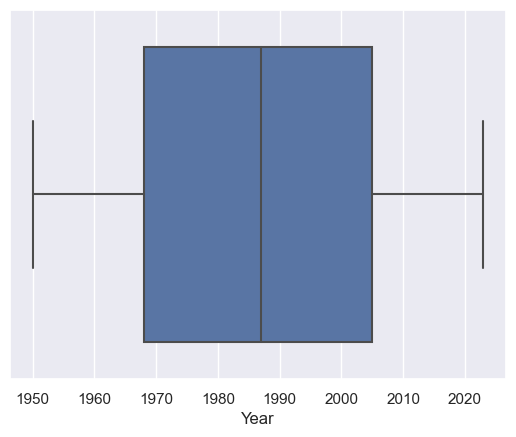

In [66]:
sns.boxplot(x=df["Year"]) 
# Detecting Outliers

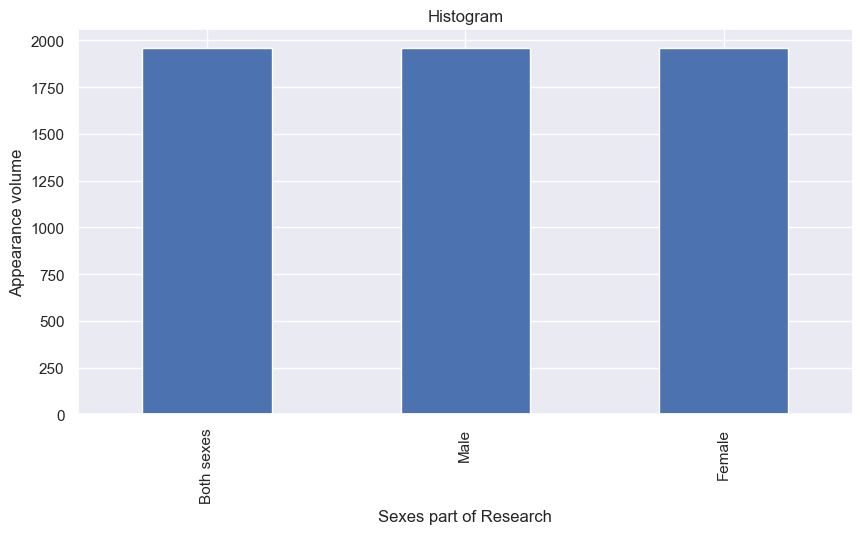

In [67]:
#Histogram - a type of chart that shows the frequency distribution
df.Sex.value_counts().nlargest(10).plot(kind="bar", figsize=(10,5))
plt.title("Histogram")
plt.ylabel("Appearance volume")
plt.xlabel("Sexes part of Research"); 

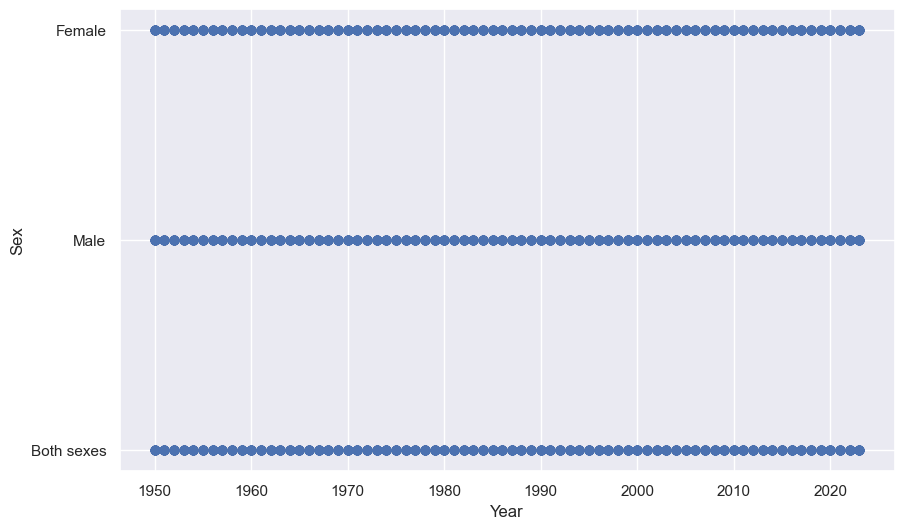

In [18]:
# Scatterplot which represent the values for different numeric variables

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df["Year"], df["Sex"])
ax.set_xlabel("Year")
ax.set_ylabel("Sex")
plt.show() 

C:\Users\Bruno\AppData\Local\Temp\ipykernel_5472\648452270.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= df.corr()


,Year,Value
Year,1.000000,0.110005
Value,0.110005,1.000000


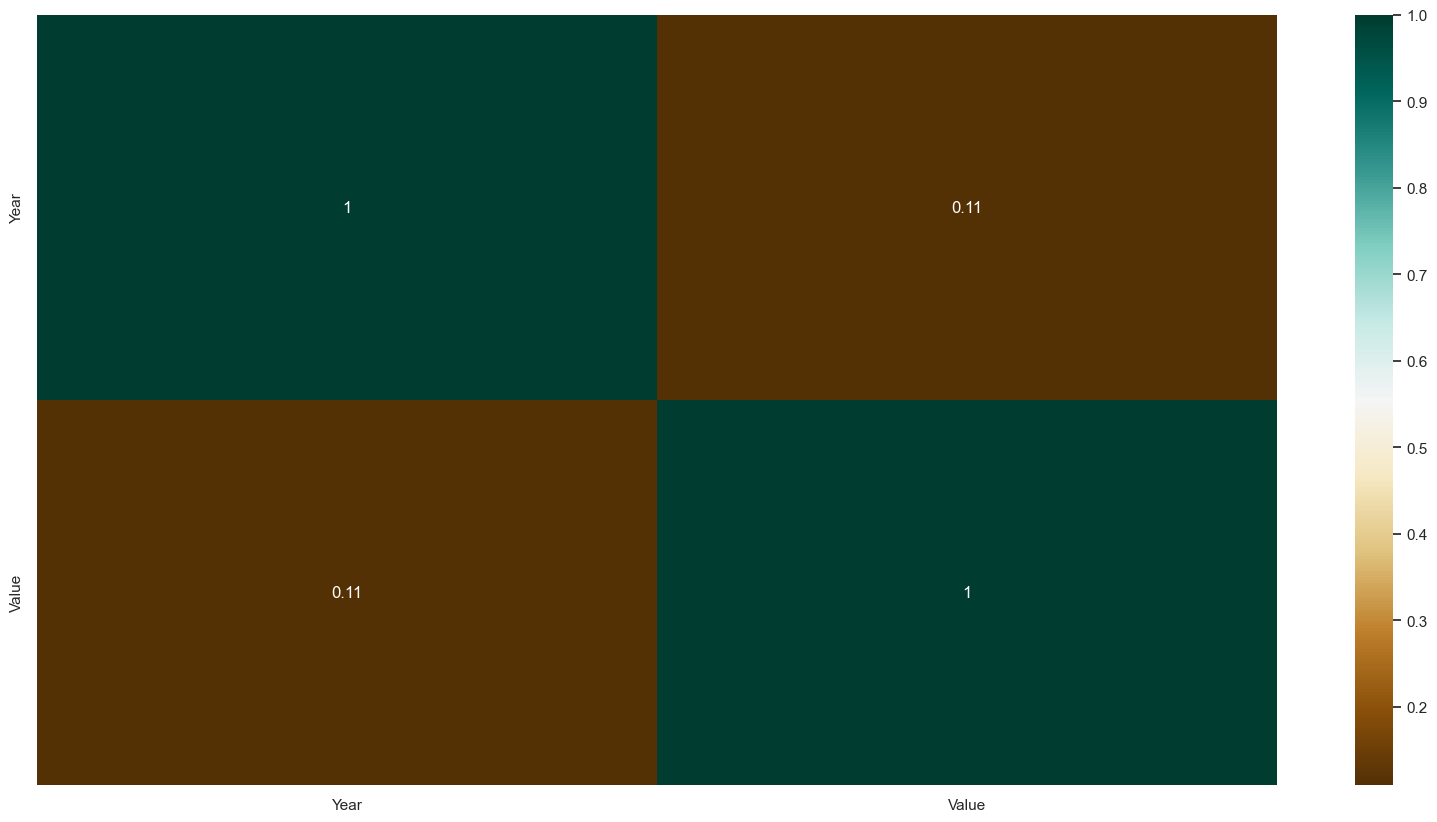

In [19]:
# Heat Map - In order to find the relations between the variables

plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

array([[<Axes: title={'center': 'Value'}>]], dtype=object)

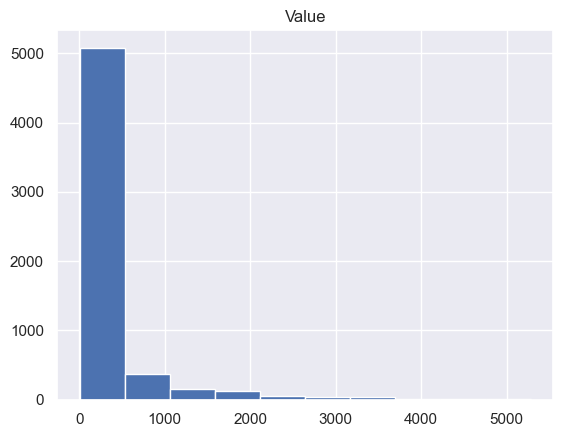

In [20]:
#histogram of the frequency
df.hist(column="Value") 

array([[<Axes: title={'center': 'Value'}>]], dtype=object)

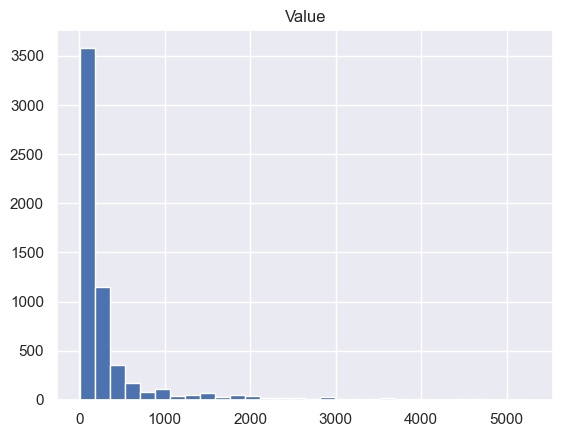

In [21]:
#histogram of the frequency
df.hist(column="Value", bins=30) 

C:\Users\Bruno\AppData\Local\Temp\ipykernel_5472\989524671.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Value)


<Axes: xlabel='Value', ylabel='Density'>

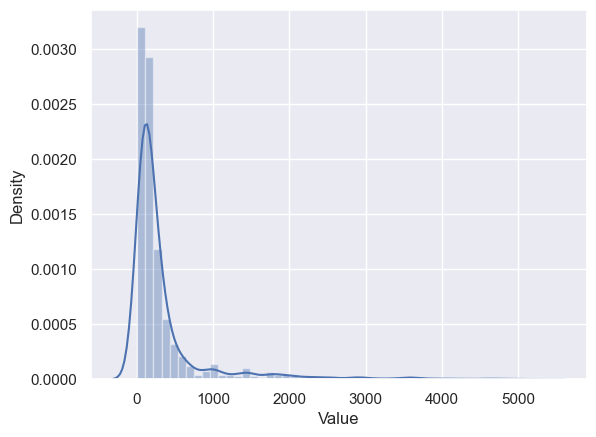

In [22]:
sns.distplot(df.Value)
# In order to create a distribution plot for the 'Value' column in DataFrame 'df'.


C:\Users\Bruno\AppData\Local\Temp\ipykernel_5472\3036903171.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Value, kde=False)


<Axes: xlabel='Value'>

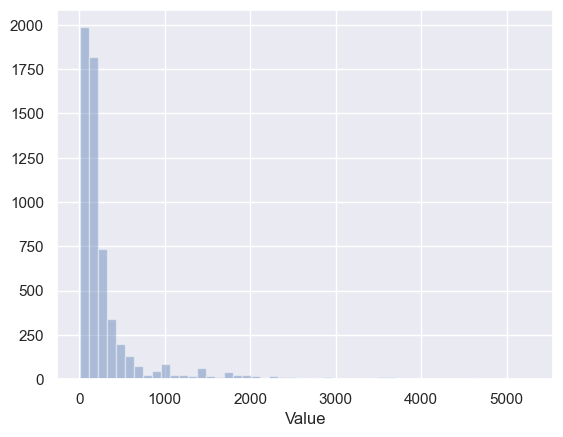

In [23]:
sns.distplot(df.Value, kde=False) 
# Aiming to create a histogram without kernel density estimation for 'Value'.

C:\Users\Bruno\AppData\Local\Temp\ipykernel_5472\1162194159.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Value, kde=False, bins=100)


<Axes: xlabel='Value'>

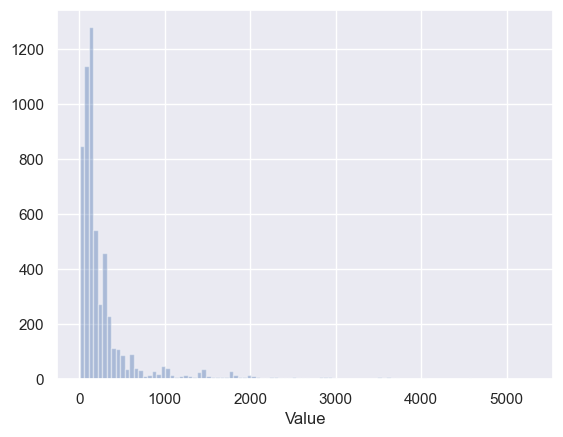

In [71]:
sns.distplot(df.Value, kde=False, bins=100) 
# In order to create a detailed histogram for 'Value' with 100 bins.

C:\Users\Bruno\AppData\Local\Temp\ipykernel_5472\3554419425.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df.Value), kde=False)


<Axes: xlabel='Value'>

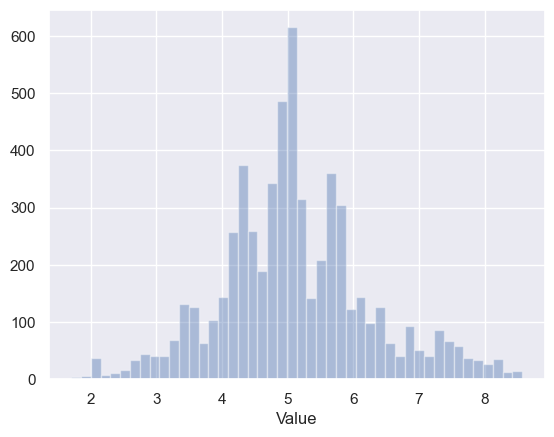

In [72]:
sns.distplot(np.log(df.Value), kde=False) 
# In order to create another detailed histogram which can provide a more nuanced understanding of the data.

### Bar Plot and Calculating the Mean Sex Distribution

In [27]:
df.Sex.unique()
# In order to get unique values in the 'Sex' column of DataFrame 'df'.

array(['Both sexes', 'Male', 'Female'], dtype=object)

In [28]:
df.Value.unique()
# In order to get unique values in the 'Value' column of DataFrame 'df'.

array([  61.1,   31.4,   29.7, ..., 5281.6, 2606.2, 2675.4])

In [29]:
cut_count_table = pd.crosstab(index=df['Sex'],columns='Value') 
cut_count_table

#Aiing to create a frequency table for 'Sex' column, counting occurrences of each category.

col_0,Value
Sex,
Both sexes,1960
Female,1960
Male,1960


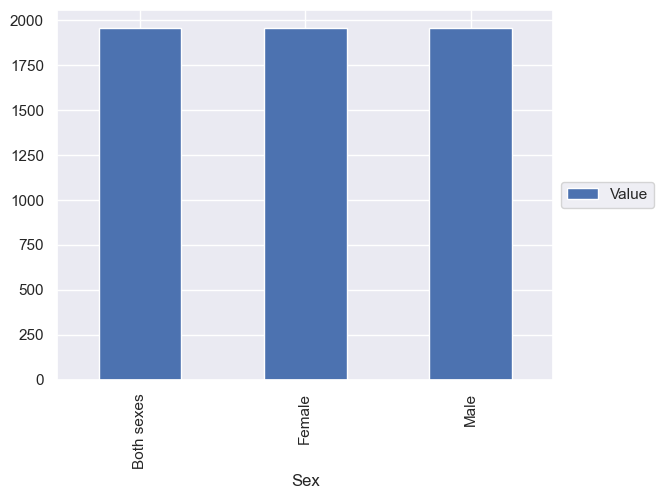

In [30]:
cut_count_table.plot(kind='bar')
# Create a bar chart for the frequency table.

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# Place the legend to the right of the plot for better visibility.

In [31]:
from numpy import median, mean
# in order to import 'median' and 'mean' from numpy.

sns.set(style="whitegrid")
# Set the style for seaborn plots to 'whitegrid'.

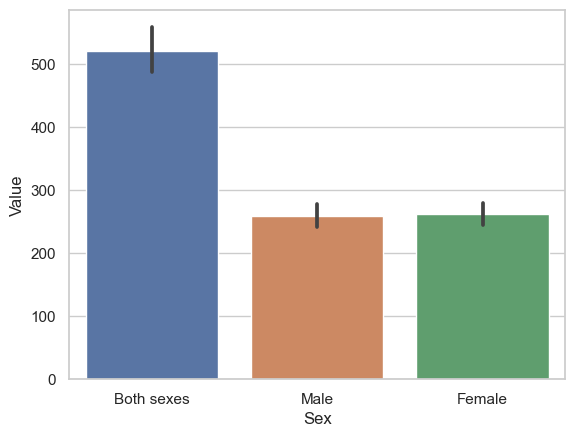

In [32]:
ax = sns.barplot(x="Sex", y="Value", data=df,estimator=mean)
# Aiming to create a bar plot using seaborn with 'Sex' on the x-axis and 'Value' on the y-axis.

### What is the current population of Ireland? - Visualization

In [33]:
df.tail(3)
# Exploratore Data Analysis
# Observe the data by using the tail function

,Year,Age_Group,Sex,Value
5991,2023,All ages,Both sexes,5281.6
5992,2023,All ages,Male,2606.2
5993,2023,All ages,Female,2675.4


In [73]:
year_to_isolate = 2023
# Specify the year to isolate in the DataFrame.

data_for_specific_year = df[df['Year'] == year_to_isolate]  # Extract data for 2023.

data_for_specific_year


,Year,Age_Group,Sex,Value
5913,2023,Under 1 year,Both sexes,55.7
5914,2023,Under 1 year,Male,27.4
5915,2023,Under 1 year,Female,28.3
5916,2023,0 - 4 years,Both sexes,293.8
5917,2023,0 - 4 years,Male,149.2
...,...,...,...,...
5989,2023,85 years and over,Male,33.1
5990,2023,85 years and over,Female,53.9
5991,2023,All ages,Both sexes,5281.6
5992,2023,All ages,Male,2606.2


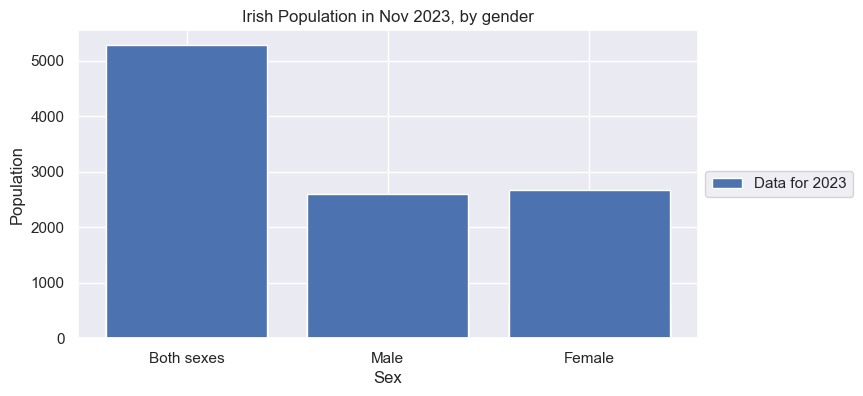

In [74]:
# Creating a line plot of the data for the specific year

plt.figure(figsize=(8, 4))
# Setting the figure size.

plt.bar(data_for_specific_year['Sex'], data_for_specific_year['Value'], label='Data for 2023')
# Creating a bar chart for data in 2023.

plt.xlabel('Sex')
plt.ylabel('Population')
# Label the axes.

plt.title('Irish Population in Nov 2023, by gender')
# Set the title.

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# Place the legend to the right of the plot.

plt.show()
# Display the plot.

### How has it changed over the past decade? 

In [75]:
def visualize_changes_and_growth(data):
    
    filtered_data = data[(data["Year"] >= 1950) & (data["Year"] <= 2023)]
    # Filter data for the years 1950 to 2023.

    pivoted_data = filtered_data.pivot(index="Year", columns="Sex", values="Value")
    # Pivot the data for easy comparison.
    
    plt.figure(figsize=(6, 3))
    # Set the figure size.
    
    for sex in pivoted_data.columns:
        initial_value = pivoted_data[sex].iloc[0]
        percentage_growth = (pivoted_data[sex] - initial_value) / initial_value * 100
        plt.plot(pivoted_data.index, percentage_growth, label=sex)
    # Calculate percentage growth and plot for each gender.
    
    plt.title("Percentage of Growth by Year (1950-2023)")
    plt.xlabel("Year")
    plt.ylabel("Percentage Growth")
    plt.legend()
    plt.grid(True)
    # Set the title, labels, legend, and grid.
    
    plt.show()
    # Display the plot.

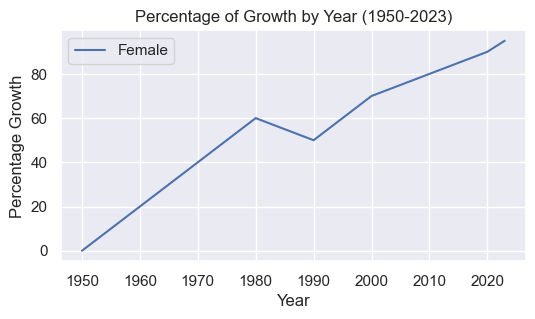

In [76]:
data = pd.DataFrame({
    "Year": [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2023],
    "Sex": ["Female", "Female", "Female", "Female", "Female", "Female", "Female", "Female", "Female"],
    "Value": [100, 120, 140, 160, 150, 170, 180, 190, 195]})
# Create a DataFrame with year, gender, and population data.


visualize_changes_and_growth(data)
# Visualize changes and growth in population over the specified years.

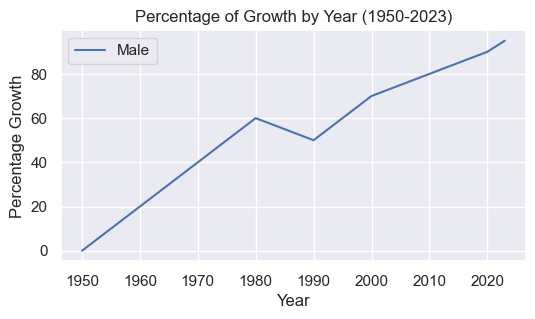

In [77]:
data = pd.DataFrame({
    "Year": [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2023],
    "Sex": ["Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male"],
    "Value": [100, 120, 140, 160, 150, 170, 180, 190, 195]})
# Create a DataFrame with year, gender, and population data.

visualize_changes_and_growth(data)
# Visualize changes and growth in population over the specified years.

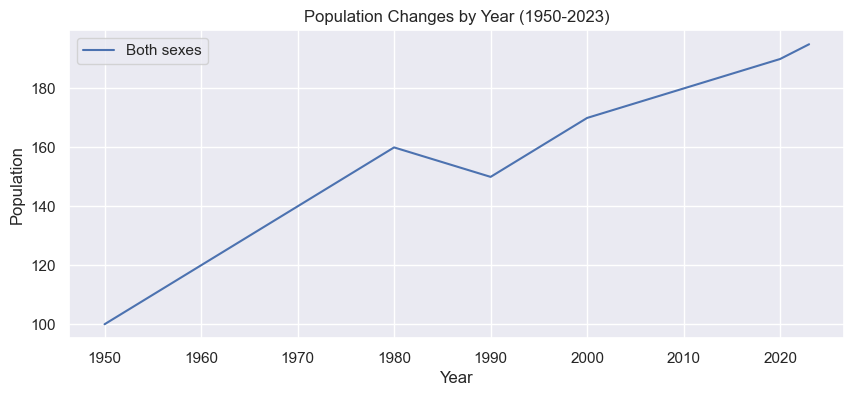

In [81]:
data = pd.DataFrame({
    "Year": [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2023],
    "Sex": ["Both sexes", "Both sexes", "Both sexes", "Both sexes", "Both sexes", "Both sexes", "Both sexes", "Both sexes", "Both sexes"],
    "Value": [100, 120, 140, 160, 150, 170, 180, 190, 195]})
# Create a DataFrame with year, gender, and population data.

visualize_population_changes(data)
# Visualize changes and growth in population over the specified years.

### Heat Map - Yearly Growth

In [86]:
def plot_heatmap(csv_file):
    
    df['Value'] = df['Value'] / 100
    # Normalize 'Value' to percentage.
    
    pivot_table = df.pivot_table(index='Year', columns='Sex', values='Value')
    # Create a pivot table for heatmap.
    
    plt.figure(figsize=(25, 18))
    sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
    # Create and customize the heatmap using Seaborn.
    
    plt.title('Population Estimates Heatmap')
    plt.xlabel('Sex')
    plt.ylabel('Year')
    plt.show()
    # Add title, labels, and display the heatmap.


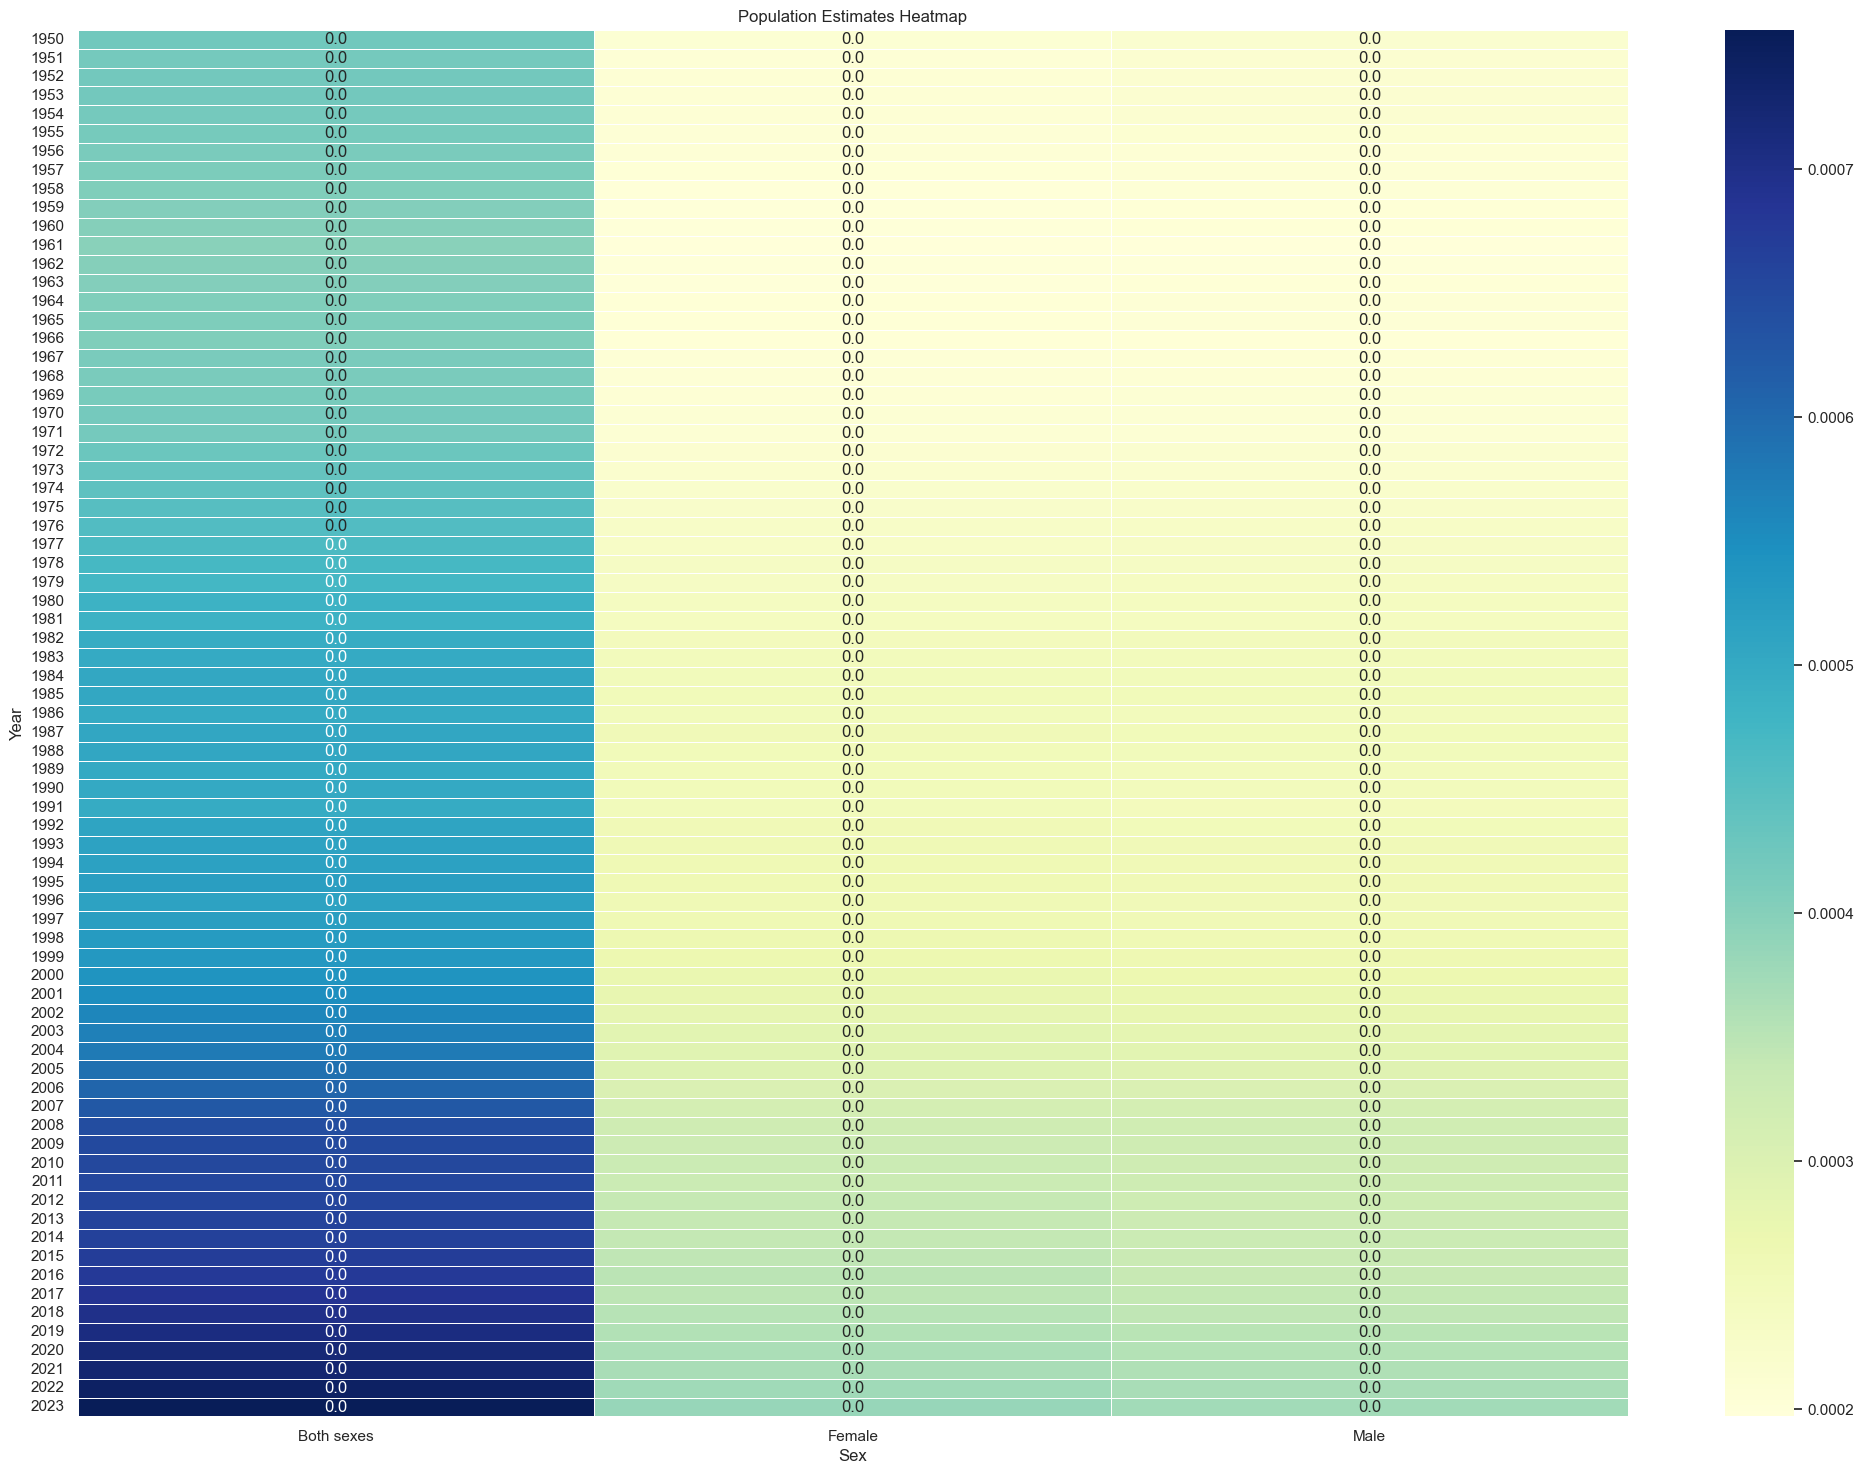

In [87]:
csv_file = 'Population_Estimates_202309.CSV'  #In order to epecify the CSV file.
plot_heatmap(csv_file)  # Generate and display a heatmap from the given CSV file.


### 1.2 Statistics and Machine Learning for Data Analytics



In [44]:
df = pd.read_csv("Population_Estimates_202309.csv")
df.describe(include=object)
# It provides summary statistics specifically for the columns containing data types. This can be useful to understand the characteristics of categorical or textual data.

,STATISTIC,STATISTIC Label,C02076V02508,Age Group,C02199V02655,Sex,UNIT
count,5994,5994,5994,5994,5994,5994,5994
unique,1,1,27,27,3,3,1
top,PEA01,Population Estimates (Persons in April),200,Under 1 year,-,Both sexes,Thousand
freq,5994,5994,222,222,1998,1998,5994


#### Linear Regression and 2 Decades Projections

    Year      Male    Female
0   2024  3.422647  3.517200
1   2025  3.446036  3.542665
2   2026  3.469424  3.568131
3   2027  3.492813  3.593597
4   2028  3.516201  3.619062
5   2029  3.539589  3.644528
6   2030  3.562978  3.669993
7   2031  3.586366  3.695459
8   2032  3.609755  3.720925
9   2033  3.633143  3.746390
10  2034  3.656532  3.771856
11  2035  3.679920  3.797322
12  2036  3.703309  3.822787
13  2037  3.726697  3.848253
14  2038  3.750085  3.873718
15  2039  3.773474  3.899184
16  2040  3.796862  3.924650
17  2041  3.820251  3.950115
18  2042  3.843639  3.975581
19  2043  3.867028  4.001046


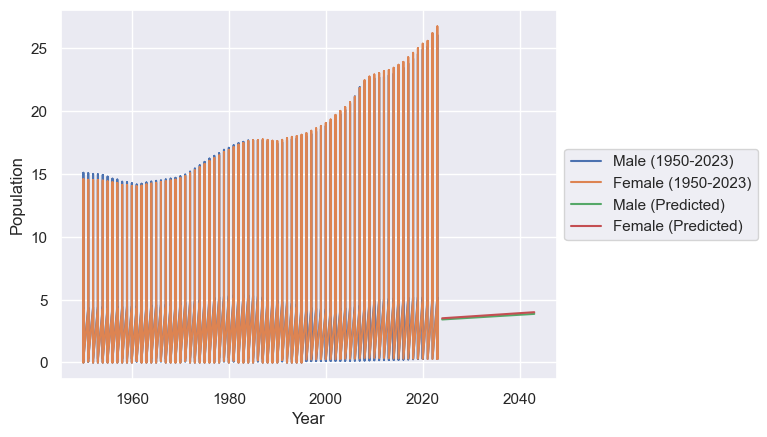

In [88]:
import pandas as pd
# Import pandas for data manipulation and analysis.

from sklearn.model_selection import train_test_split
# Split data for training and testing.

from sklearn.linear_model import LinearRegression
# Import linear regression model.

import matplotlib.pyplot as plt
# Import matplotlib for plotting.

import numpy as np
# Import numpy for numerical operations and array handling.


# Load the data
data = pd.read_csv("Population_Estimates_202309.csv")

# Filter the data for the years between 1950 and 2023 for both sexes
filtered_data = data[(data['Year'] >= 1950) & (data['Year'] <= 2023) & (data['Sex'].isin(['Male', 'Female']))]

# Create a pivot table to have separate columns for Male and Female
pivot_table = filtered_data.pivot_table(values='VALUE', index=['Year', 'Age Group'], columns='Sex', aggfunc='sum').reset_index()

# Prepare the data for model training
X = np.array(pivot_table['Year']).reshape(-1, 1)
y_male = pivot_table['Male'].values.reshape(-1, 1)
y_female = pivot_table['Female'].values.reshape(-1, 1)

# Train linear regression models for Male and Female
model_male = LinearRegression()
model_male.fit(X, y_male)

model_female = LinearRegression()
model_female.fit(X, y_female)

# Function to predict population for the next 2 decades
def predict_population(years):
    years_array = np.array(years).reshape(-1, 1)
    
    prediction_male = model_male.predict(years_array) / 100  # Scale down by dividing by 100
    prediction_female = model_female.predict(years_array) / 100  # Scale down by dividing by 100
    
    prediction_df = pd.DataFrame({
        'Year': years,
        'Male': prediction_male.flatten(),
        'Female': prediction_female.flatten()
    })
    
    return prediction_df

# Predict population for the next 2 decades (2024 to 2043)
future_years = range(2024, 2044)
predictions = predict_population(future_years)

# Display the scaled-down predictions
print(predictions)

# Plot the scaled-down predictions
plt.plot(pivot_table['Year'], pivot_table['Male'] / 100, label='Male (1950-2023)')  # Scale down by dividing by 100
plt.plot(pivot_table['Year'], pivot_table['Female'] / 100, label='Female (1950-2023)')  # Scale down by dividing by 100
plt.plot(predictions['Year'], predictions['Male'], label='Male (Predicted)')
plt.plot(predictions['Year'], predictions['Female'], label='Female (Predicted)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
